# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [18]:
pip install newsapi-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Initial imports
import os
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
from dotenv import load_dotenv
load_dotenv()
%matplotlib inline

In [2]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)
newsapi

In [4]:
# Fetch the Bitcoin news articles
bitcoin = newsapi.get_everything(q="Bitcoin", language="en", sort_by="relevancy")
# Print total articles
print(f"Total articles about Bitcoin: {bitcoin['totalResults']}")

# Show sample article
bitcoin["articles"][0]


Total articles about Bitcoin: 8040


{'source': {'id': None, 'name': 'Lifehacker.com'},
 'author': 'David Murphy',
 'title': 'What You Need to Know About Buying Cryptocurrency on PayPal',
 'description': 'Whether you’re looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, you’ll be able to pay various merchants using your cryptocurrency stas…',
 'url': 'https://lifehacker.com/what-you-need-to-know-about-buying-cryptocurrency-on-pa-1846585705',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/qvc2foo4ufow1cbsuk9f.jpg',
 'publishedAt': '2021-03-31T14:00:00Z',
 'content': 'Whether youre looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, youll be ab… [+3818 chars]'}

In [5]:
# Fetch the Ethereum news articles
ethereum = newsapi.get_everything(q="Ethereum", language="en", sort_by="relevancy")
# Print total articles
print(f"Total articles about Ethereum: {ethereum['totalResults']}")

# Show sample article
ethereum["articles"][0]

Total articles about Ethereum: 2525


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Adi Robertson',
 'title': 'India will reportedly introduce bill to make owning cryptocurrency illegal',
 'description': 'India’s legislature is reportedly considering a near-total ban on private cryptocurrencies like Bitcoin or Ethereum, including owning the virtual currency. The government has discussed plans for a national digital currency as an alternative.',
 'url': 'https://www.theverge.com/2021/3/15/22332677/india-cryptocurrency-trading-mining-possession-ban-law-report',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/IdgNJaOIQBsN8QbQcH2MDU6sAUA=/0x243:2040x1311/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/10432811/mdoying_180308_2373_0091still.jpg',
 'publishedAt': '2021-03-15T22:25:02Z',
 'content': 'One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat…

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        bitcoin_sentiments.append({
            "text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass

# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
bitcoin_df

# Reorder the columns
cols = ["Compound", "Negative", "Neutral","Positive", "text",]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.0772,0.000,0.961,0.039,Whether youre looking to make a larger investm...
1,0.5859,0.000,0.873,0.127,"As it promised earlier this year, Tesla now ac..."
2,0.3182,0.000,0.935,0.065,The inevitable has happened: You can now purch...
3,0.2023,0.000,0.950,0.050,Tesla made headlines earlier this year when it...
4,0.6075,0.102,0.719,0.178,National Burrito Day lands on April Fools Day ...


In [7]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        ethereum_sentiments.append({
            "text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass

# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)
ethereum_df

# Reorder the columns
cols = ["Compound", "Negative", "Neutral","Positive", "text",]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,Compound,Negative,Neutral,Positive,text
0,-0.5574,0.110,0.890,0.000,One of the strictest crackdowns worldwide\r\nP...
1,0.0772,0.000,0.961,0.039,Whether youre looking to make a larger investm...
2,0.0000,0.000,1.000,0.000,Famed auction house Christies just sold its fi...
3,0.0000,0.000,1.000,0.000,Payment card network Visa has announced that t...
4,0.5650,0.093,0.735,0.172,The NFT craze has been an intriguing moment fo...


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()


,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.205990,0.028250,0.898150,0.073600
std,0.365651,0.047327,0.082379,0.067474
min,-0.557400,0.000000,0.709000,0.000000
25%,0.000000,0.000000,0.863250,0.029250
50%,0.307100,0.000000,0.925500,0.065500
75%,0.366350,0.054500,0.940250,0.085500
max,0.771700,0.142000,1.000000,0.240000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,-0.012240,0.041950,0.919950,0.038150
std,0.301147,0.047487,0.080009,0.050393
min,-0.557400,0.000000,0.735000,0.000000
25%,-0.250000,0.000000,0.905750,0.000000
50%,0.000000,0.021000,0.934000,0.000000
75%,0.058000,0.080750,1.000000,0.071750
max,0.565000,0.145000,1.000000,0.172000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
lemmatizer = WordNetLemmatizer()

In [77]:
# Expand the default stopwords list if necessary
sw = set(stopwords.words('english'))
sw_addon = {'chars', 'ha', 'reuters', 'youre', 'said', 'according', 'inc', 'make', 'announced', 'took', 'using', 'one', 'day'}
all_sw = sw.union(sw_addon)
print(all_sw)

{'then', 'doesn', 'don', "that'll", 'in', 'when', 'an', 'each', 'yourself', 're', "hasn't", 'your', 'yours', 'our', 'own', 'theirs', 'hers', 'can', 'a', 't', 'are', 'wouldn', 'while', "wasn't", 'do', "haven't", 'not', 'she', 'this', 'was', 'weren', 'make', 'here', 'ma', 'nor', 'using', 'just', 'such', 'one', 'what', 'wasn', 'against', 'announced', 'who', 'their', "shouldn't", 'yourselves', 'have', 'mustn', 'will', 'after', "didn't", 'few', 'he', 'so', 'again', 'very', "you'll", 'other', 'they', 'on', 'those', 'any', 'couldn', 'reuters', 'ha', 'himself', 'before', 'and', 'aren', 'of', 'too', 'whom', 'as', 'same', "hadn't", 'd', 's', 'm', 'hasn', 'myself', 'which', 'am', 'herself', "don't", 'being', 'it', 'both', "needn't", 'more', 'ourselves', 'now', 'me', "doesn't", 'further', 'mightn', 'said', 'youre', 'why', 'from', 'we', 'didn', 'over', 'out', 'all', "weren't", 'been', 'shan', 'should', 'took', "wouldn't", 'by', 'below', 'there', 'its', 'chars', 'only', 'did', 'had', 'won', 'day', '

In [78]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Create a list of the words
    # Convert the words to lowercase
    # Remove the stop words
    # Remove the punctuation
    # Lemmatize Words into root words
    
    sw = set(stopwords.words('english'))
    sw_addon = {'chars', 'ha', 'reuters', 'youre', 'said', 'according', 'inc', 'make', 'announced', 'took', 'using', 'one', 'day'}
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in words if word.lower() not in sw.union(sw_addon)]
    
    return tokens


In [79]:
# Create a new tokens column for bitcoin
bitcoin_df["tokens"]= bitcoin_df["text"].apply(tokenizer)
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0772,0.000,0.961,0.039,Whether youre looking to make a larger investm...,"[whether, looking, larger, investment, want, d..."
1,0.5859,0.000,0.873,0.127,"As it promised earlier this year, Tesla now ac...","[promised, earlier, year, tesla, accepts, paym..."
2,0.3182,0.000,0.935,0.065,The inevitable has happened: You can now purch...,"[inevitable, happened, purchase, tesla, vehicl..."
3,0.2023,0.000,0.950,0.050,Tesla made headlines earlier this year when it...,"[tesla, made, headlines, earlier, year, signif..."
4,0.6075,0.102,0.719,0.178,National Burrito Day lands on April Fools Day ...,"[national, burrito, lands, april, fools, year,..."


In [80]:
# Create a new tokens column for ethereum
ethereum_df["tokens"] = ethereum_df["text"].apply(tokenizer)
ethereum_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.5574,0.110,0.890,0.000,One of the strictest crackdowns worldwide\r\nP...,"[strictest, crackdowns, worldwidephoto, michel..."
1,0.0772,0.000,0.961,0.039,Whether youre looking to make a larger investm...,"[whether, looking, larger, investment, want, d..."
2,0.0000,0.000,1.000,0.000,Famed auction house Christies just sold its fi...,"[famed, auction, house, christies, sold, first..."
3,0.0000,0.000,1.000,0.000,Payment card network Visa has announced that t...,"[payment, card, network, visa, transactions, s..."
4,0.5650,0.093,0.735,0.172,The NFT craze has been an intriguing moment fo...,"[nft, craze, intriguing, moment, digital, arti..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [81]:
from collections import Counter
from nltk import ngrams

In [75]:
# Making the text to one big string for Bitcoin article
bitcoin_text= []
for word in bitcoin_df["text"]:
    bitcoin_text.append(word)
btc_big_string = ' '.join(bitcoin_text)
btc_big_string

'Whether youre looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, youll be ab… [+3818 chars] As it promised earlier this year, Tesla now accepts payment in Bitcoin, according to Tesla\'s website and a tweet from CEO Elon Musk. In a subsequent tweet, Musk said that "Bitcoin paid to Tesla will … [+1390 chars] The inevitable has happened: You can now purchase a Tesla vehicle with Bitcoin.\xa0\r\nThis is according to Tesla CEO, pardon, Technoking Elon Musk, who tweeted it on Wednesday.\xa0\r\nYou can now buy a Tesla … [+1648 chars] Tesla made headlines earlier this year when it took out significant holdings in bitcoin, acquiring a roughly $1.5 billion stake at then-prices in early February. At the time, it also noted in an SEC … [+2071 chars] National Burrito Day lands on April Fools Day this year, but thankfully restaurants arent playing around with their deals. Start

In [17]:
# tokenize the Bitcoin string
btc_processed = tokenizer(btc_big_string)
print(btc_processed)

['whether', 'looking', 'larger', 'investment', 'want', 'dabble', 'cryptocurrencies', 'purchase', 'bitcoin', 'ethereum', 'bitcoin', 'cash', 'litecoin', 'paypal', 'soon', 'youll', 'ab', 'promised', 'earlier', 'year', 'tesla', 'accepts', 'payment', 'bitcoin', 'teslas', 'website', 'tweet', 'ceo', 'elon', 'musk', 'subsequent', 'tweet', 'musk', 'bitcoin', 'paid', 'tesla', 'inevitable', 'happened', 'purchase', 'tesla', 'vehicle', 'bitcointhis', 'tesla', 'ceo', 'pardon', 'technoking', 'elon', 'musk', 'tweeted', 'wednesdayyou', 'buy', 'tesla', 'tesla', 'made', 'headlines', 'earlier', 'year', 'significant', 'holdings', 'bitcoin', 'acquiring', 'roughly', 'billion', 'stake', 'thenprices', 'early', 'february', 'time', 'also', 'noted', 'sec', 'national', 'burrito', 'lands', 'april', 'fools', 'year', 'thankfully', 'restaurants', 'arent', 'playing', 'around', 'deals', 'starting', 'tomorrow', 'restaurants', 'like', 'pollo', 'loco', 'moes', 'southwest', 'grill', 'strictest', 'crackdowns', 'worldwidephot

In [18]:
# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = Counter(ngrams(btc_processed, n=2))
dict(btc_bigram_counts.most_common(20))

{('earlier', 'year'): 2,
 ('elon', 'musk'): 2,
 ('nonfungible', 'tokens'): 2,
 ('microstrategy', 'major'): 2,
 ('major', 'bitcoin'): 2,
 ('bitcoin', 'corporate'): 2,
 ('corporate', 'backer'): 2,
 ('backer', 'monday'): 2,
 ('monday', 'nonemployee'): 2,
 ('nonemployee', 'directors'): 2,
 ('directors', 'get'): 2,
 ('get', 'fees'): 2,
 ('fees', 'services'): 2,
 ('services', 'bitcoin'): 2,
 ('bitcoin', 'instead'): 2,
 ('stafffile', 'photo'): 2,
 ('virtual', 'currency'): 2,
 ('currency', 'bitcoin'): 2,
 ('bitcoin', 'us'): 2,
 ('us', 'dollar'): 2}

In [19]:
# Making the text to one big string for Ethereum article
ethereum_text= []
for word in ethereum_df["text"]:
    ethereum_text.append(word)
    # append all words for each article to the word_tokenized list
eth_big_string = ' '.join(ethereum_text)

In [20]:
# tokenize the Ethereum string
eth_processed = tokenizer(eth_big_string)
print(eth_processed)

['strictest', 'crackdowns', 'worldwidephoto', 'michele', 'doying', 'vergeindia', 'reportedly', 'moving', 'forward', 'sweeping', 'ban', 'cryptocurrencies', 'countrys', 'legislat', 'whether', 'looking', 'larger', 'investment', 'want', 'dabble', 'cryptocurrencies', 'purchase', 'bitcoin', 'ethereum', 'bitcoin', 'cash', 'litecoin', 'paypal', 'soon', 'youll', 'ab', 'famed', 'auction', 'house', 'christies', 'sold', 'first', 'purely', 'digital', 'piece', 'art', 'whopping', 'million', 'price', 'buyer', 'got', 'digital', 'file', 'collage', 'images', 'complex', 'legac', 'payment', 'card', 'network', 'visa', 'transactions', 'settled', 'usd', 'coin', 'usdc', 'stablecoin', 'powered', 'ethereum', 'blockchain', 'cryptocom', 'first', 'company', 'test', 'new', 'capabi', 'nft', 'craze', 'intriguing', 'moment', 'digital', 'artists', 'seen', 'seen', 'great', 'leaps', 'tech', 'allowed', 'create', 'work', 'much', 'progress', 'shifting', 'profit', 'move', 'fast', 'break', 'things', 'get', 'hackedthats', 'happ

In [21]:
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = Counter(ngrams(eth_processed, n=2))
dict(eth_bigram_counts.most_common(20))

{('nonfungible', 'tokens'): 3,
 ('nft', 'craze'): 2,
 ('cryptocurrency', 'platform'): 2,
 ('damien', 'hirst'): 2,
 ('strictest', 'crackdowns'): 1,
 ('crackdowns', 'worldwidephoto'): 1,
 ('worldwidephoto', 'michele'): 1,
 ('michele', 'doying'): 1,
 ('doying', 'vergeindia'): 1,
 ('vergeindia', 'reportedly'): 1,
 ('reportedly', 'moving'): 1,
 ('moving', 'forward'): 1,
 ('forward', 'sweeping'): 1,
 ('sweeping', 'ban'): 1,
 ('ban', 'cryptocurrencies'): 1,
 ('cryptocurrencies', 'countrys'): 1,
 ('countrys', 'legislat'): 1,
 ('legislat', 'whether'): 1,
 ('whether', 'looking'): 1,
 ('looking', 'larger'): 1}

In [22]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    word_counts = Counter(tokens)
    return Counter(tokens).most_common(N)

In [23]:
# Get the top 10 words for Bitcoin
print(token_count(btc_processed, N=10))

[('bitcoin', 17), ('tesla', 6), ('cryptocurrencies', 4), ('year', 4), ('paypal', 3), ('musk', 3), ('like', 3), ('crypto', 3), ('investment', 2), ('purchase', 2)]


In [24]:
# Get the top 10 words for Ethereum
print(token_count(eth_processed, N=10))

[('nft', 5), ('cryptocurrency', 5), ('ethereum', 4), ('digital', 4), ('new', 4), ('cryptocurrencies', 3), ('bitcoin', 3), ('first', 3), ('platform', 3), ('nonfungible', 3)]


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [26]:
# Process text for wordcloud creation

def process_text(doc):
    sw = set(stopwords.words('english'))
    sw_addon = {'chars', 'ha', 'reuters', 'youre', 'said', 'according', 'inc', 'make', 'announced', 'took', 'using', 'one', 'day'}
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in words if word.lower() not in sw.union(sw_addon)]
    return ' '.join(output)

btc_input_text = process_text(btc_big_string)
btc_input_text


'whether looking larger investment want dabble cryptocurrencies purchase bitcoin ethereum bitcoin cash litecoin paypal soon youll ab promised earlier year tesla accepts payment bitcoin teslas website tweet ceo elon musk subsequent tweet musk bitcoin paid tesla inevitable happened purchase tesla vehicle bitcointhis tesla ceo pardon technoking elon musk tweeted wednesdayyou buy tesla tesla made headlines earlier year significant holdings bitcoin acquiring roughly billion stake thenprices early february time also noted sec national burrito lands april fools year thankfully restaurants arent playing around deals starting tomorrow restaurants like pollo loco moes southwest grill strictest crackdowns worldwidephoto michele doying vergeindia reportedly moving forward sweeping ban cryptocurrencies countrys legislat hacker behind last years big twitter hack sentenced hard timegraham ivan clark teenage hacker broke twitters systems verified accounts used seems like everyone making money nfts non

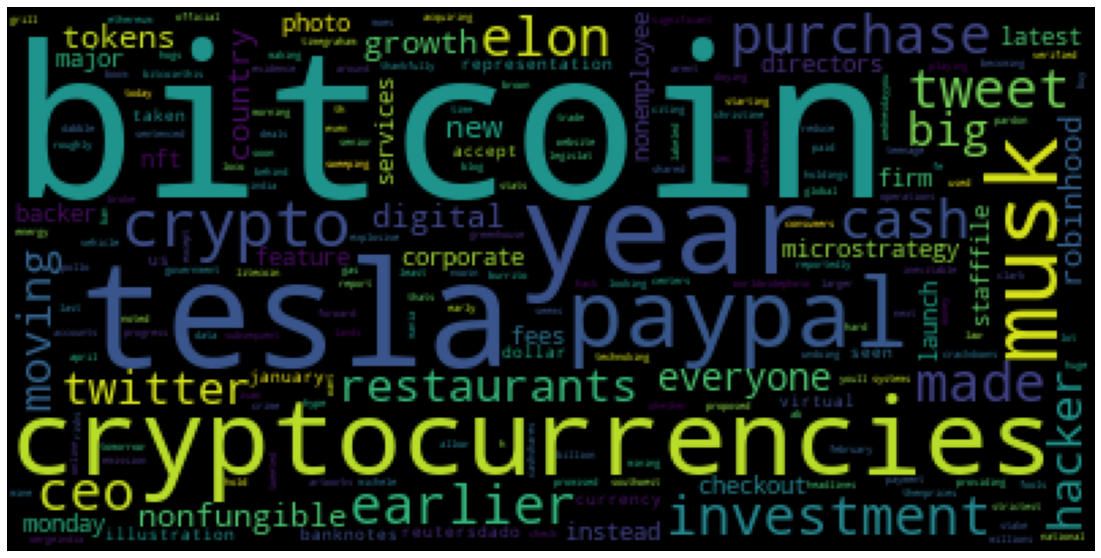

In [27]:
# Generate the Bitcoin word cloud
wc = WordCloud()
img = wc.generate(btc_input_text)
plt.axis("off")
plt.imshow(img)

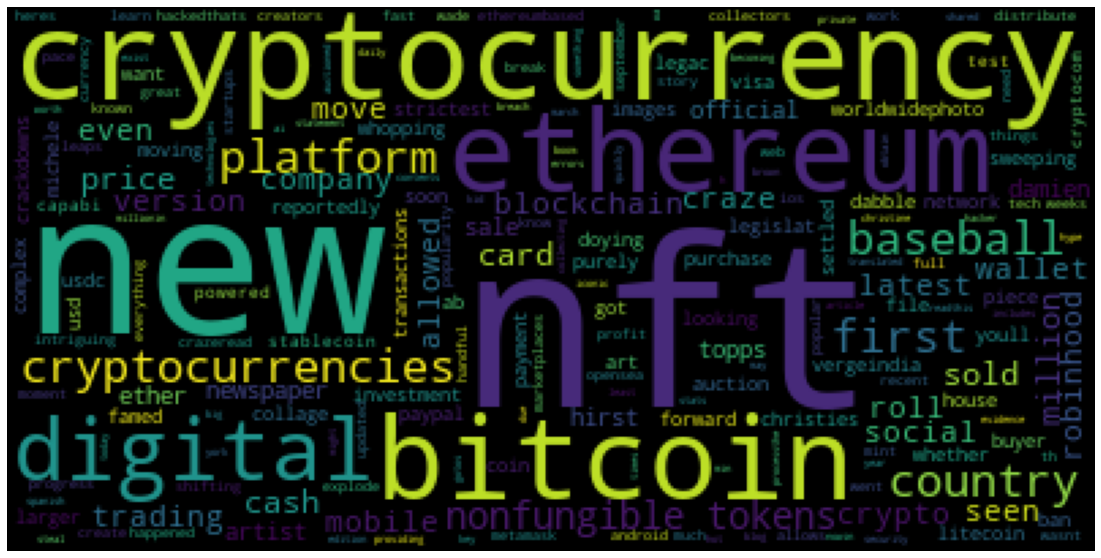

In [28]:
# Generate the Ethereum word cloud
eth_input_text = process_text(eth_big_string)
eth_input_text

wc = WordCloud()
img = wc.generate(eth_input_text)
plt.axis("off")
plt.imshow(img)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [29]:
import spacy
from spacy import displacy

In [30]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [31]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [64]:
# Concatenate all of the bitcoin text together (calling )
bitcoin_text= []
for word in bitcoin_df["text"]:
    bitcoin_text.append(word)
    # append all words for each article to the word_tokenized list
btc_big_string = ' '.join(bitcoin_text)
btc_big_string

'Whether youre looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, youll be ab… [+3818 chars] As it promised earlier this year, Tesla now accepts payment in Bitcoin, according to Tesla\'s website and a tweet from CEO Elon Musk. In a subsequent tweet, Musk said that "Bitcoin paid to Tesla will … [+1390 chars] The inevitable has happened: You can now purchase a Tesla vehicle with Bitcoin.\xa0\r\nThis is according to Tesla CEO, pardon, Technoking Elon Musk, who tweeted it on Wednesday.\xa0\r\nYou can now buy a Tesla … [+1648 chars] Tesla made headlines earlier this year when it took out significant holdings in bitcoin, acquiring a roughly $1.5 billion stake at then-prices in early February. At the time, it also noted in an SEC … [+2071 chars] National Burrito Day lands on April Fools Day this year, but thankfully restaurants arent playing around with their deals. Start

In [65]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(btc_big_string)

In [66]:
# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [67]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [68]:
# List all Entities
for token in bitcoin_doc.ents:
    print(token.text, token.label_)

Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
earlier this year DATE
Tesla ORG
Bitcoin PERSON
Tesla ORG
Elon Musk PERSON
Musk PERSON
Tesla ORG
Tesla ORG
Bitcoin PERSON
Elon Musk PERSON
Wednesday DATE
earlier this year DATE
roughly $1.5 billion MONEY
early February DATE
SEC ORG
National Burrito Day EVENT
April Fools Day DATE
this year DATE
tomorrow DATE
Pollo Loco FAC
Photo PERSON
Michele Doying PERSON
India GPE
Reuters ORG
last years DATE
Twitter PRODUCT
Graham Ivan Clark PERSON
Twitters NORP
India GPE
Reuters ORG
a big year DATE
Robinhood ORG
today DATE
Christine Brown PERSON
Robinhoods PERSON
Reuters ORG
Reuters ORG
Inc PERSON
Monday DATE
this morning TIME
millions CARDINAL
Reuters ORG
April 12 DATE
Reuters ORG
Monday DATE
Funko PERSON
NFT ORG
TokenWave ORG
23, 2021 DATE
Spanish NORP
AI ORG
Bitcoin PERSON
The Wise Origin Bitcoin ETF WORK_OF_ART
the United States GPE
FD Funds Management LLC ORG
Reuters ORG
Bitcoin PERSON
U.S. GPE
January 8, 2021 DATE
Dado Ru PERSON
Reuters ORG
Bitcoin PER

---

## Ethereum NER

In [69]:
# Concatenate all of the ethereum text together
ethereum_text= []
for word in ethereum_df["text"]:
    ethereum_text.append(word)
    # append all words for each article to the word_tokenized list
eth_big_string = ' '.join(ethereum_text)
eth_big_string

"One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat… [+1656 chars] Whether youre looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, youll be ab… [+3818 chars] Famed auction house Christies just sold its first purely digital piece of art for a whopping $69 million. For that price, the buyer got a digital file of a collage of 5,000 images and a complex legac… [+12891 chars] Payment card network Visa has announced that transactions can be settled using USD Coin (USDC), a stablecoin powered by the Ethereum blockchain. Crypto.com is the first company to test the new capabi… [+2187 chars] The NFT craze has been an intriguing moment for digital artists who have seen seen great leaps in how tech has allowed them to create 

In [71]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_big_string)

# Add a title to the document
eth_doc.user_data["title"] = "Ethreum NER"

In [72]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [74]:
# List all Entities
for token in eth_doc.ents:
    print(token.text, token.label_)

One CARDINAL
Photo PERSON
Michele Doying PERSON
India GPE
Reuters ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Christies ORG
first ORDINAL
$69 million MONEY
5,000 CARDINAL
Visa ORG
USD Coin ORG
Ethereum ORG
Crypto.com ORG
first ORDINAL
NFT ORG
Ethereum ORG
NFT ORG
recent weeks DATE
MetaMask PRODUCT
one CARDINAL
Ethereum ORG
September 2020 DATE
about $5.7 million MONEY
a big year DATE
Robinhood ORG
today DATE
Christine Brown PERSON
Robinhoods PERSON
26, 2021 DATE
Spanish NORP
AI ORG
New York Times ORG
daily DATE
Topps GPE
first ORDINAL
NFT ORG
36.32 MONEY
April 3 DATE
90% PERCENT
Last month DATE
hours TIME
Beeple’s ORG
$69 million MONEY
NFT ORG
24 CARDINAL
24 CARDINAL
MLB ORG
NFT ORG
Major League Baseball ORG
NFT ORG
Topps GPE
India GPE
Reuters ORG
Damien Hirst PERSON
Chris Young PERSON
Superstar PERSON
Damien Hirst PERSON
Ethereum ORG
Dado Ruvic PERSON
Reuters ORG
Friday DATE
60,000.</li MONEY
Apple ORG
Amazon ORG
iPad ORG
